In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('./ablation.csv')
df

,Name,model_name,percentage,pruningType,bleu
0,hopeful-microwave-205,model2,0.891308,class-distribution,0.000096
1,stellar-snowball-204,model2,0.840426,class-distribution,0.000661
2,charmed-water-203,model3,0.928190,class-distribution,0.019366
3,treasured-glade-202,model2,0.772889,class-distribution,0.018377
4,firm-dust-201,model2,0.662339,class-distribution,0.098623
...,...,...,...,...,...
140,upbeat-frost-13,NaN,0.300000,class-blind,0.278753
141,winter-violet-12,NaN,0.200000,class-uniform,0.282361
142,scarlet-wood-11,NaN,0.200000,class-blind,0.282245
143,eternal-butterfly-10,NaN,0.100000,class-uniform,0.283096


In [112]:
df.loc[df['model_name'].isnull(),'model_name'] = 'model0'
df

,Name,model_name,percentage,pruningType,bleu
0,hopeful-microwave-205,model2,0.891308,class-distribution,0.000096
1,stellar-snowball-204,model2,0.840426,class-distribution,0.000661
2,charmed-water-203,model3,0.928190,class-distribution,0.019366
3,treasured-glade-202,model2,0.772889,class-distribution,0.018377
4,firm-dust-201,model2,0.662339,class-distribution,0.098623
...,...,...,...,...,...
140,upbeat-frost-13,model0,0.300000,class-blind,0.278753
141,winter-violet-12,model0,0.200000,class-uniform,0.282361
142,scarlet-wood-11,model0,0.200000,class-blind,0.282245
143,eternal-butterfly-10,model0,0.100000,class-uniform,0.283096


In [113]:
arr = df.to_numpy()[:,1:]

In [114]:
types = ['class-distribution', 'class-blind','class-uniform','random']
final = []
for tp in types:
    hey = []
    arr = df[df['pruningType'] == tp].to_numpy()[:,[1,2,4]]

    for i,j,k in arr:
        to_find = np.around(j,decimals=2)
        blue = arr[:,2][np.abs(arr[:,1]-to_find)<0.01]
        blue = blue.sum()/3
        hey.append([ to_find, blue])
    final.append(hey)
            

In [115]:
np.where(arr[:,1]==0.9)

(array([ 0,  2, 18]),)

In [116]:
final

[[[0.89, 0.0018870308149710332],
  [0.84, 0.0011610206301714999],
  [0.93, 0.013372451254049933],
  [0.77, 0.0187903436609675],
  [0.66, 0.1080551871916212],
  [0.64, 0.12996777007860236],
  [0.89, 0.0018870308149710332],
  [0.61, 0.1523430054353276],
  [0.58, 0.17076567233342324],
  [0.55, 0.1915216370090361],
  [0.84, 0.0011610206301714999],
  [0.52, 0.20959759143977638],
  [0.77, 0.0187903436609675],
  [0.49, 0.2273580657493058],
  [0.66, 0.1080551871916212],
  [0.46, 0.24082839334660222],
  [0.64, 0.12996777007860236],
  [0.42, 0.252831821419561],
  [0.61, 0.1523430054353276],
  [0.39, 0.26163722175860676],
  [0.58, 0.17076567233342324],
  [0.35, 0.26789646272319345],
  [0.55, 0.1915216370090361],
  [0.32, 0.2738664427839063],
  [0.52, 0.20959759143977638],
  [0.28, 0.27620200579089077],
  [0.49, 0.2273580657493058],
  [0.24, 0.2797791838466376],
  [0.46, 0.24082839334660222],
  [0.2, 0.2811459485699294],
  [0.42, 0.252831821419561],
  [0.16, 0.2818300054692826],
  [0.39, 0.2616372

In [117]:
final[0][-1]

[0.04, 0.09443025295352801]

class-distribution


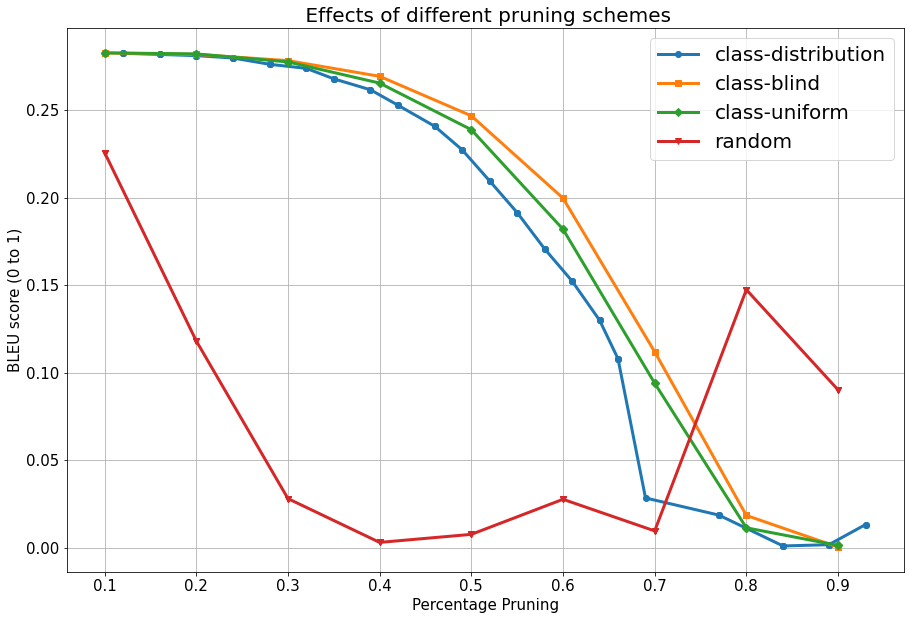

In [118]:
_,ax=plt.subplots(1, figsize=(15,10))
markers = ['o', 's', 'D', 'v']
for i,j,m in zip(types,final,markers):
    j = sorted(j, key=lambda x : x[0])
    if i == 'class-distribution':
        j = j[1:]
        print(i)
    x_y = np.array(j)
    plt.plot(x_y[:,0],x_y[:,1],marker=m,label=i,linewidth=3)
plt.legend(prop={'size': 20})    
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage Pruning',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title(' Effects of different pruning schemes', fontsize=20)
ax.grid()
plt.savefig('different_pruning_schemes4.png')
plt.show()

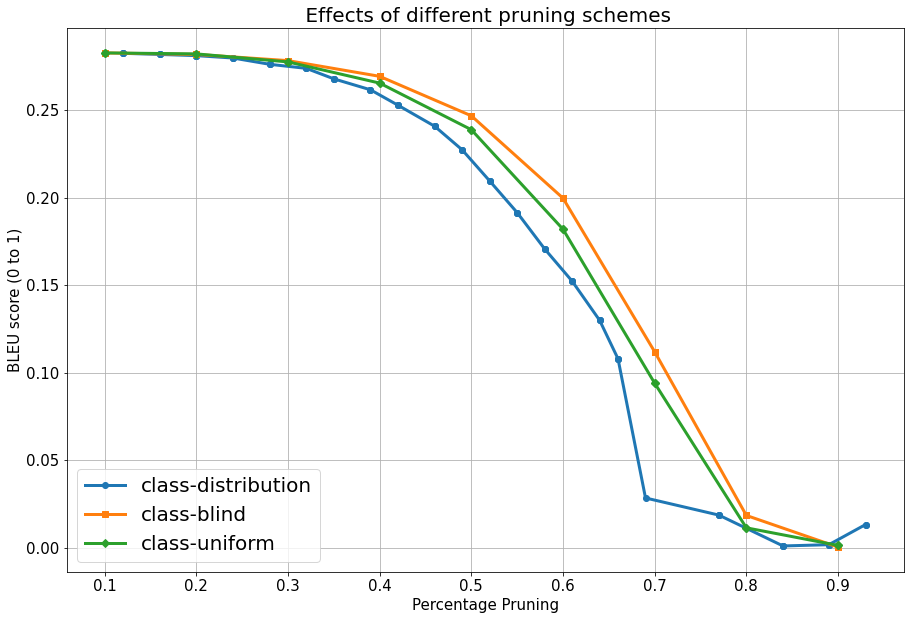

In [119]:
_,ax=plt.subplots(1, figsize=(15,10))
markers = ['o', 's', 'D', ]
for i,j,m in zip(types,final,markers):
    j = sorted(j, key=lambda x : x[0])
    if i == 'class-distribution':
        j = j[1:]
    if i == 'random':
        continue
    x_y = np.array(j)
    plt.plot(x_y[:,0],x_y[:,1],marker=m,label=i,linewidth=3)
plt.legend(loc=3,prop={'size': 20})    
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage Pruning',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.set_title(' Effects of different pruning schemes', fontsize=20)
ax.grid()
plt.savefig('different_pruning_schemes3.png')
plt.show()

## Sparse

In [120]:
df = pd.read_csv('./sparse.csv')
df

,Name,model_name,percentage,bleu
0,splendid-morning-27,model3,0.9,0.210077
1,sleek-hill-26,model2,0.9,0.210438
2,playful-blaze-24,model3,0.8,0.248398
3,pretty-flower-23,model2,0.8,0.254880
4,whole-eon-21,model3,0.7,0.262654
5,pious-tree-20,model2,0.7,0.265996
6,vibrant-pond-18,model3,0.6,0.271325
7,classic-paper-17,model2,0.6,0.268870
8,absurd-firefly-15,model3,0.5,0.271214
9,classic-bush-14,model2,0.5,0.271802


In [121]:
types = np.arange(5,10)*0.1
final_new = []
arr = df.to_numpy()[:,[1,2,3]]
for tp in types:
    a=arr[np.abs(arr[:,1]- tp) < 0.001, 2].sum()/3
    final_new.append([tp,a])
            

In [122]:
final_new = np.array(final_new)
final_new

array([[0.5       , 0.27322266],
       [0.6       , 0.27108096],
       [0.7       , 0.2654886 ],
       [0.8       , 0.25380061],
       [0.9       , 0.21522715]])

## Retraining

In [123]:
df = pd.read_csv('./pruning.csv')
types = np.arange(5,10)*0.1
final_new1 = []
arr = df.to_numpy()[:,[1,2,3]]
for tp in types:
    a=arr[np.abs(arr[:,1]- tp) < 0.001, 2].sum()/3
    final_new1.append([tp,a])
final_new1 = np.array(final_new1)
final_new1

array([[0.5       , 0.27722729],
       [0.6       , 0.27611867],
       [0.7       , 0.27518949],
       [0.8       , 0.27039806],
       [0.9       , 0.25356979]])

In [127]:
types = ['Regular pruning', 'Sparse training from beginning', 'Retraining after pruning']

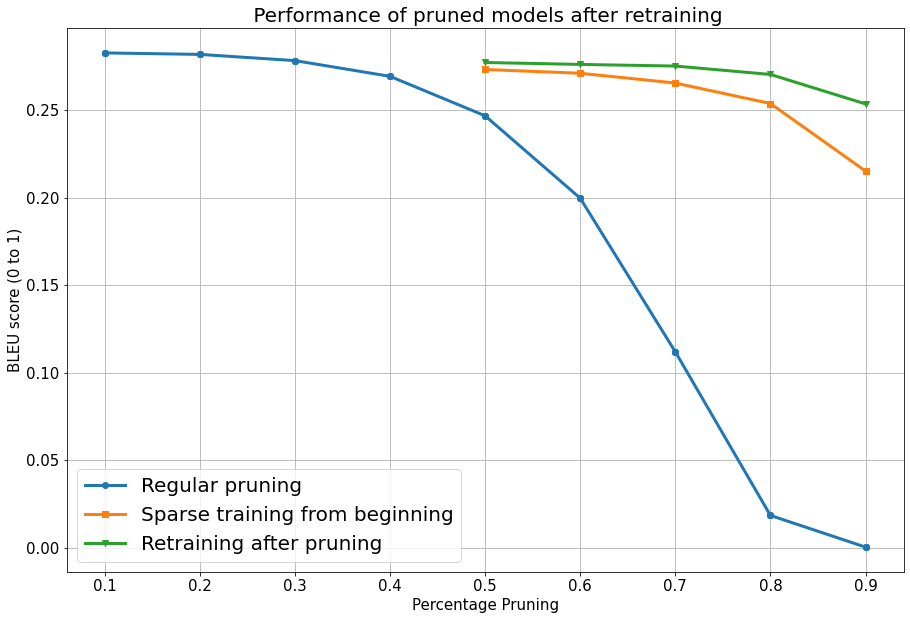

In [128]:
_,ax=plt.subplots(1, figsize=(15,10))
new_iter = [final[1], final_new,final_new1]
markers = ['o', 's',  'v']
for i,j,m in zip(types,new_iter,markers):
    j = sorted(j, key=lambda x : x[0])
    x_y = np.array(j)
    plt.plot(x_y[:,0],x_y[:,1],marker=m,label=i,linewidth=3)
    
plt.legend(loc=3,prop={'size': 20})    
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Percentage Pruning',fontsize=15)
ax.set_ylabel('BLEU score (0 to 1)',fontsize=15)
ax.grid()
ax.set_title(' Performance of pruned models after retraining', fontsize=20)
plt.savefig('retraining.png')
plt.show()

## Perplexity bar graph

In [136]:
df=pd.read_csv('./change-perplexity.csv')
df

,Name,className,pruning_type,dev_ppl
0,sunny-brook-105,label_smoothing,class-blind,7.423924
1,neat-snow-104,attention,class-blind,48.927695
2,quiet-water-103,linear2,class-blind,9.024452
3,happy-snow-102,dropout,class-blind,7.423924
4,laced-surf-101,softmax,class-blind,332.258654
5,neat-snowball-100,decoder,class-blind,14.946176
6,fluent-mountain-99,linear1,class-blind,19.473977
7,giddy-wind-98,encoder,class-blind,15.017065
8,cosmic-serenity-97,tgt_emb,class-blind,8.295393
9,absurd-glade-96,src_emb,class-blind,18.996829


In [204]:
final = []
types= ['class-blind','class-distribution','class-uniform']

for tp in types:
    arr = df[df['pruning_type']==tp].to_numpy()[:,[1,3]]
    D = []
    for i,j in arr:
        if i == 'label_smoothing' or i == 'dropout' or 'linear1'==i or 'linear2'==i:
            continue
        D.append([i,j])
    final.append(D)
final = np.array(final)
final

array([[['attention', '48.92769455234989'],
        ['softmax', '332.2586540674461'],
        ['decoder', '14.9461760671881'],
        ['encoder', '15.017065471615547'],
        ['tgt_emb', '8.295392775563352'],
        ['src_emb', '18.996829415552384']],

       [['attention', '97.98759275400477'],
        ['softmax', '187.62398572166924'],
        ['decoder', '17.683328077566717'],
        ['encoder', '49.44981715615357'],
        ['tgt_emb', '8.266429262414167'],
        ['src_emb', '18.482524162548867']],

       [['attention', '93.24557205505089'],
        ['softmax', '188.62954387130569'],
        ['decoder', '17.402434123316127'],
        ['encoder', '51.02666642979192'],
        ['tgt_emb', '8.262354498634231'],
        ['src_emb', '18.83847752100463']]], dtype='<U32')

In [209]:
# new_final = 
x_axis = np.arange(6)*1.5
bar_width = 0.3
types= ['class-blind','class-distribution','class-uniform']

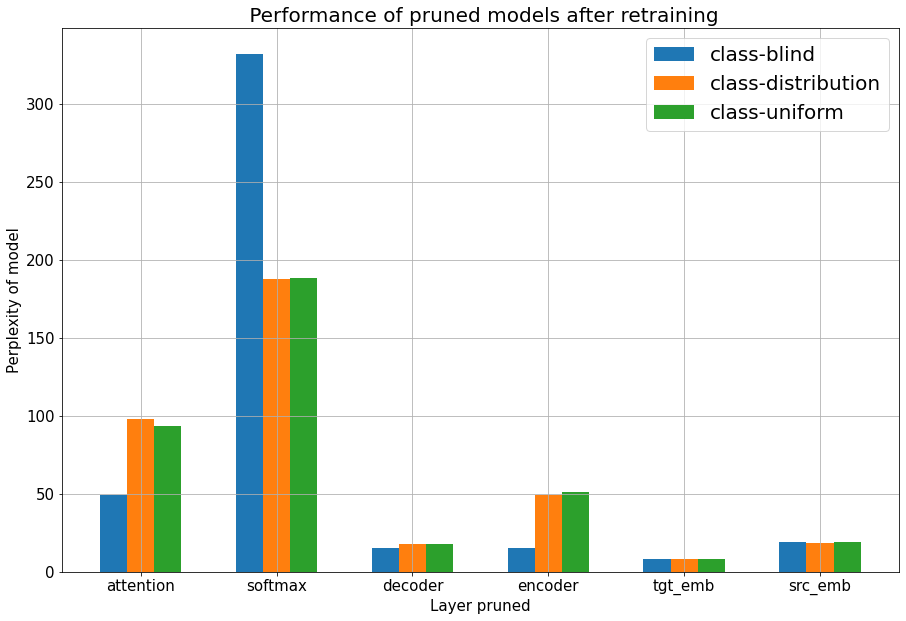

In [211]:
_,ax=plt.subplots(1, figsize=(15,10))

ax.bar(x_axis-bar_width, final[0,:,1].astype('float'), bar_width,label=types[0])
ax.bar(x_axis, final[1,:,1].astype('float'), bar_width,label=types[1])
ax.bar(x_axis+bar_width, final[2,:,1].astype('float'), bar_width,label=types[2])

ax.set_xticks(x_axis)
ax.set_xticklabels(final[0,:,0])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Layer pruned',fontsize=15)
ax.set_ylabel('Perplexity of model',fontsize=15)
ax.grid()
ax.set_title(' Performance of pruned models after retraining', fontsize=20)
plt.legend(loc=1,prop={'size': 20}) 
plt.savefig('bar-graph.png')
plt.show()